In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from keras.optimizers import Adam
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv("Churn_Modelling.csv")
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [3]:
df=df.drop("Surname", axis=1)

In [4]:
# Exploratory Data Analysis
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [5]:
country_count=df.Geography.value_counts()

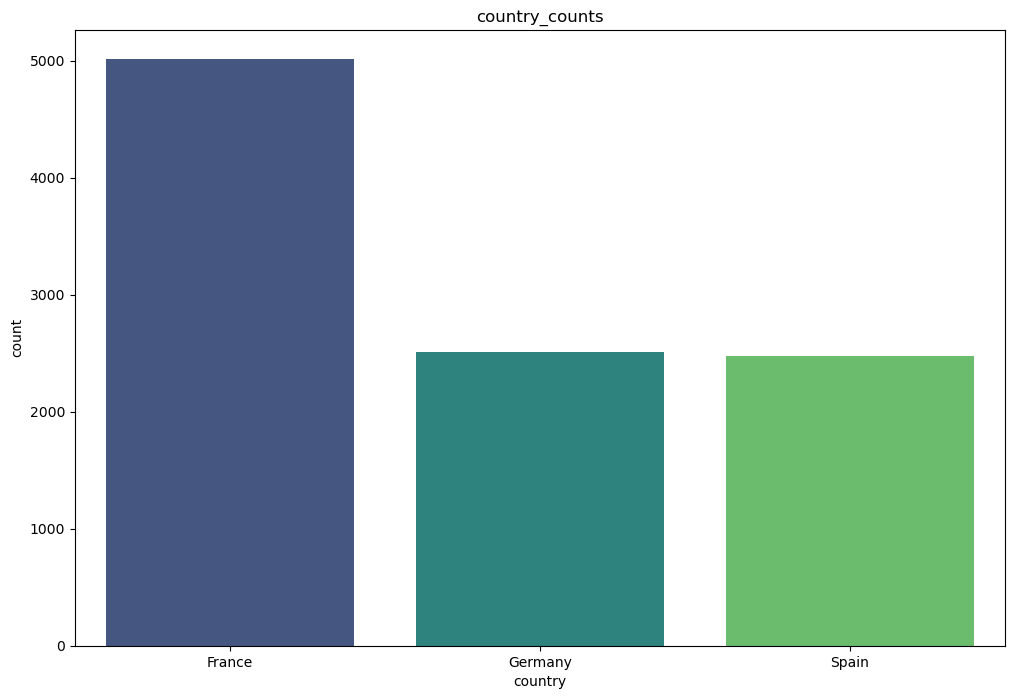

In [6]:
plt.figure(figsize=(12,8))
sns.barplot(x=country_count.index,y=country_count,palette='viridis')
plt.title('country_counts')
plt.xlabel('country')
plt.ylabel('count')
plt.show()

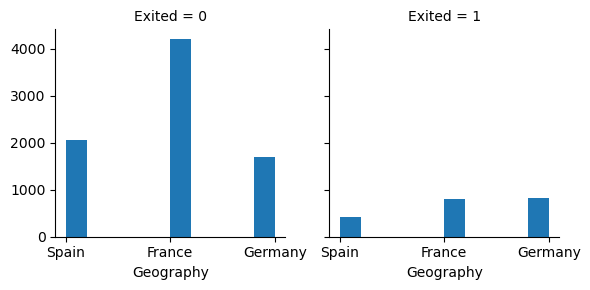

In [7]:
country=sns.FacetGrid(df,col='Exited')
country.map(plt.hist,'Geography')

In [8]:
df['Age'].value_counts()
bins = [0,20,40,60,80,100]
age_groups=pd.cut(df['Age'],bins)

<Axes: xlabel='Age', ylabel='Exited'>

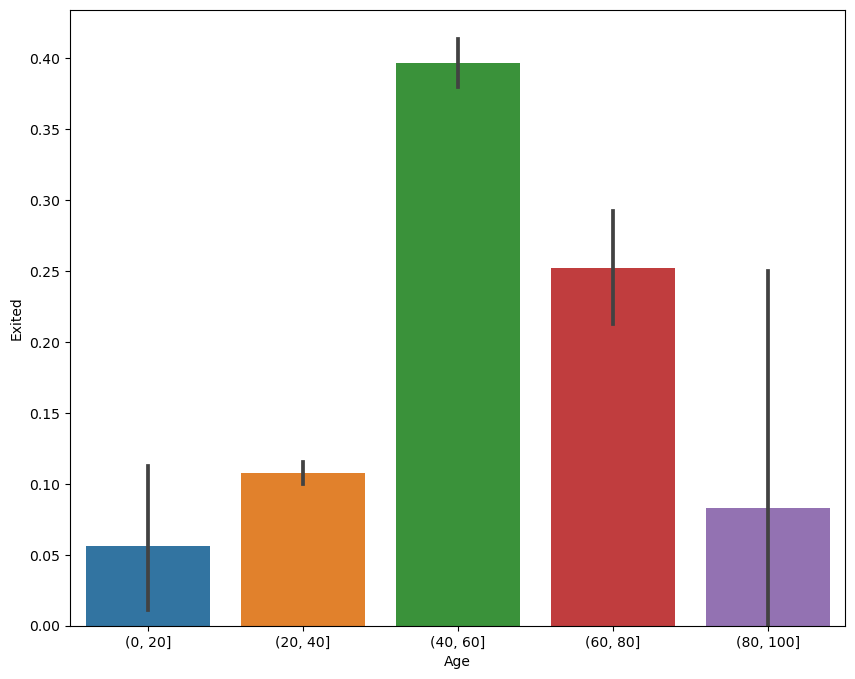

In [9]:
plt.figure(figsize=(10,8))
sns.barplot(x=age_groups,y=df['Exited'])

In [10]:
df

,RowNumber,CustomerId,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


<Axes: xlabel='Gender', ylabel='Exited'>

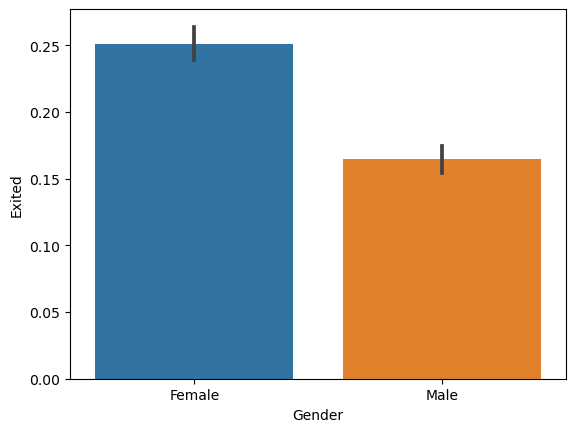

In [11]:
sns.barplot(x=df['Gender'], y=df['Exited'])

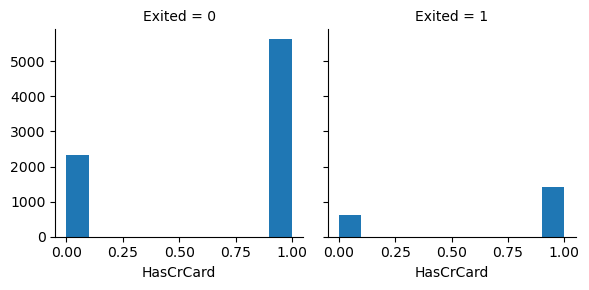

In [12]:
hascard=sns.FacetGrid(df, col='Exited')
hascard.map(plt.hist,'HasCrCard')

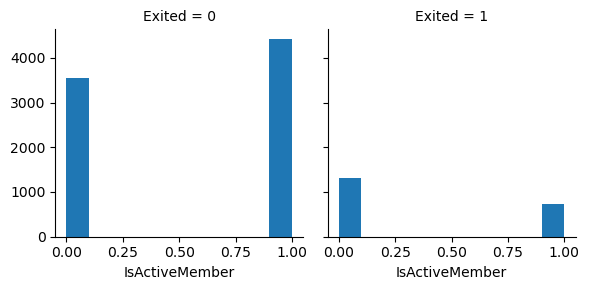

In [13]:
IsActMembers = sns.FacetGrid(df,col='Exited')
IsActMembers.map(plt.hist,'IsActiveMember')

In [14]:
df['CreditScore'].value_counts()
bins = [380,480,580,680,780,880,990,1190]
Cred=pd.cut(df['CreditScore'],bins)

<Axes: xlabel='CreditScore', ylabel='Exited'>

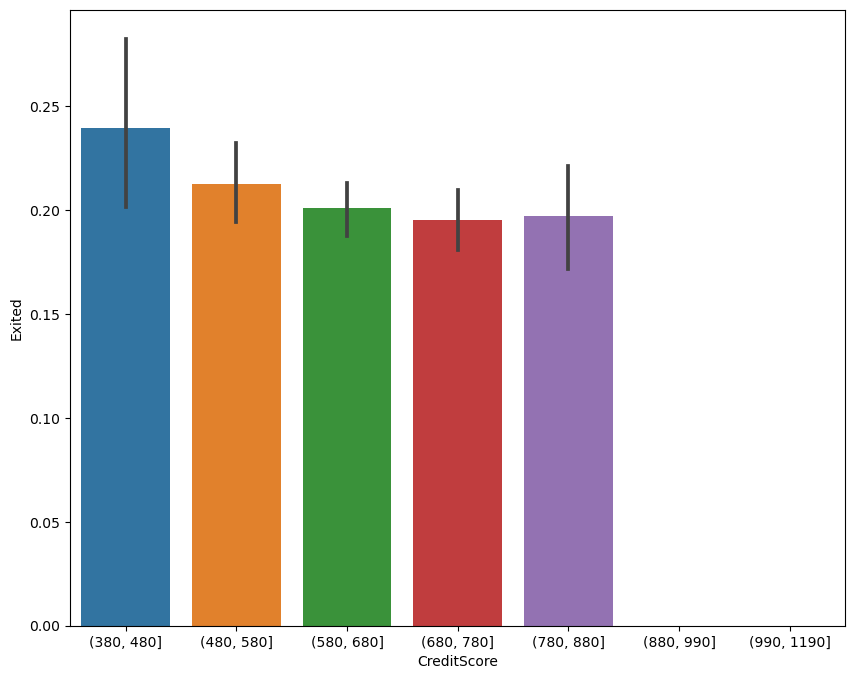

In [15]:
plt.figure(figsize=(10,8))
sns.barplot(x=Cred,y=df['Exited'])

In [16]:
#DATA Preprocesing
df['Gender']=df['Gender'].replace({'Female':0,'Male':1})

In [17]:
df.head()

,RowNumber,CustomerId,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,619,France,0,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,608,Spain,0,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,502,France,0,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,699,France,0,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,850,Spain,0,43,2,125510.82,1,1,1,79084.10,0


In [18]:
df=df.drop('Geography', axis=1)

In [19]:
df

,RowNumber,CustomerId,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,619,0,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,608,0,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,502,0,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,699,0,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,850,0,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,771,1,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,516,1,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,709,0,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,772,1,42,3,75075.31,2,1,0,92888.52,1


In [20]:
X=df.drop('Exited', axis=1)
y=df['Exited']

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
scaler=MinMaxScaler()

In [23]:
X_train,X_test,y_train,y_test=train_test_split(X,y, test_size=0.2)

In [24]:
# For training data
X_train_sc = scaler.fit_transform(X_train)

# For testing data
X_test_sc = scaler.transform(X_test)

In [25]:
X_train_sc.shape

(8000, 11)

In [26]:
model = Sequential()
input_shape=11
model.add(Dense(units=64,activation='relu',input_shape=(input_shape,)))
model.add(Dense(units=64, activation= 'relu'))
model.add(Dense(units=32, activation='relu'))
model.add(Dense(units=2, activation='softmax'))


In [27]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [28]:
history = model.fit(X_train_sc, y_train, epochs=10, batch_size=32, validation_data=(X_test_sc, y_test))

Epoch 1/10
250/250 [==============================] - 1s 2ms/step - loss: 0.4694 - accuracy: 0.7980 - val_loss: 0.4368 - val_accuracy: 0.8175
Epoch 2/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4173 - accuracy: 0.8219 - val_loss: 0.4112 - val_accuracy: 0.8280
Epoch 3/10
250/250 [==============================] - 0s 1ms/step - loss: 0.3814 - accuracy: 0.8439 - val_loss: 0.3878 - val_accuracy: 0.8445
Epoch 4/10
250/250 [==============================] - 0s 1ms/step - loss: 0.3678 - accuracy: 0.8510 - val_loss: 0.3846 - val_accuracy: 0.8470
Epoch 5/10
250/250 [==============================] - 0s 1ms/step - loss: 0.3630 - accuracy: 0.8497 - val_loss: 0.3757 - val_accuracy: 0.8490
Epoch 6/10
250/250 [==============================] - 0s 1ms/step - loss: 0.3559 - accuracy: 0.8525 - val_loss: 0.3771 - val_accuracy: 0.8560
Epoch 7/10
250/250 [==============================] - 0s 1ms/step - loss: 0.3543 - accuracy: 0.8555 - val_loss: 0.3780 - val_accuracy: 0.8460
Epoch 

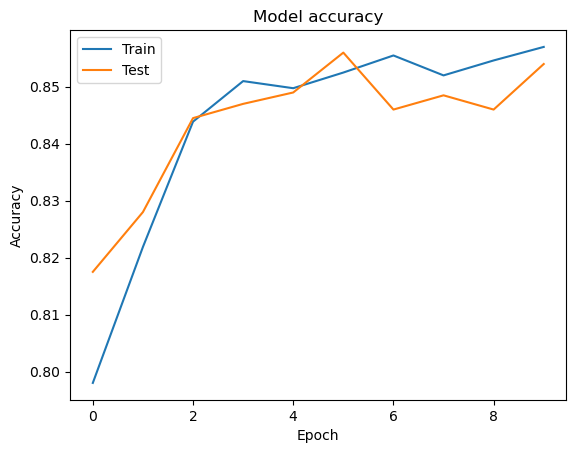

In [29]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

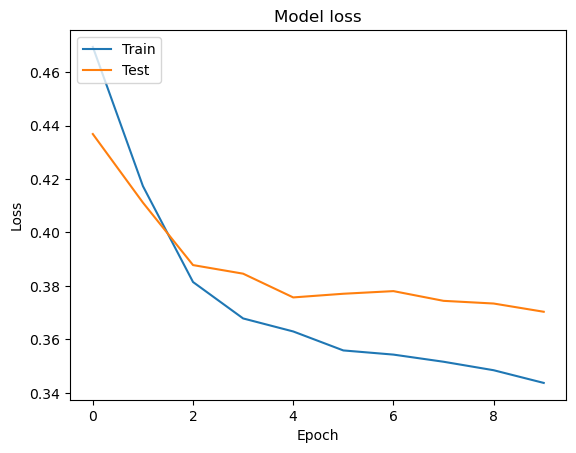

In [30]:
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()